Saving 8. Student Performance Prediction.csv to 8. Student Performance Prediction.csv
Accuracy: 92.90%
Precision: 93.36%
Recall: 91.74%


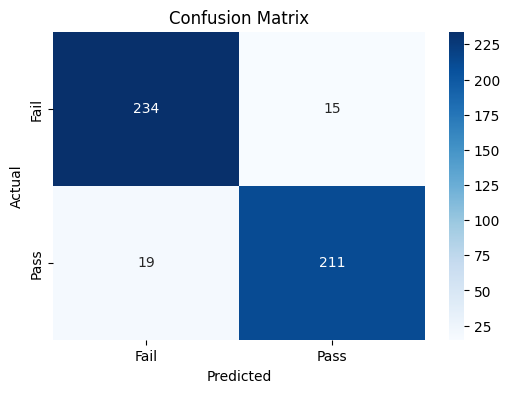

In [4]:
# Upload CSV file
from google.colab import files
uploaded = files.upload()

# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Load dataset
df = pd.read_csv("8. Student Performance Prediction.csv")  # Replace with your filename if different

# Create binary target variable: Pass = 1 if GPA >= 2.0, else 0
df['Pass'] = (df['GPA'] >= 2.0).astype(int)

# Select features and target
X = df.drop(columns=['StudentID', 'GPA', 'GradeClass', 'Pass'])
y = df['Pass']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fail", "Pass"], yticklabels=["Fail", "Pass"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
